In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [150]:
CH4 = pd.read_csv('../data/CH4.csv')
CO2 = pd.read_csv('../data/CO2.csv')
F = pd.read_csv('../data/NO2.csv')
NO2 = pd.read_csv('../data/NO2.csv')
CH4 = CH4.iloc[: -1]
CO2 = CO2.iloc[: -1]
F = F.iloc[: -1]
NO2 = NO2.iloc[: -1]

In [151]:
CH4.drop(columns=['unit'], inplace=True)
CH4.rename(columns={'Country/Region': 'Country'}, inplace=True)

df_CH4 = []
for country in CH4['Country'].unique():
    df = pd.DataFrame(CH4[CH4['Country']==country].drop(columns=['Country']).values.reshape(-1, 1), columns=['AverageCH4'])
    df.insert(0, 'Country', country)
    df['year'] = np.arange(1990, 2020)
    df_CH4.append(df)
df_CH4 = pd.concat(df_CH4)

F.drop(columns=['unit'], inplace=True)
F.rename(columns={'Country/Region': 'Country'}, inplace=True)

df_F = []
for country in F['Country'].unique():
    df = pd.DataFrame(F[F['Country']==country].drop(columns=['Country']).values.reshape(-1, 1), columns=['AverageF'])
    df.insert(0, 'Country', country)
    df['year'] = np.arange(1990, 2020)
    df_F.append(df)
df_F = pd.concat(df_F)

NO2.drop(columns=['unit'], inplace=True)
NO2.rename(columns={'Country/Region': 'Country'}, inplace=True)

df_NO2 = []
for country in NO2['Country'].unique():
    df = pd.DataFrame(NO2[NO2['Country']==country].drop(columns=['Country']).values.reshape(-1, 1), columns=['AverageNO2'])
    df.insert(0, 'Country', country)
    df['year'] = np.arange(1990, 2020)
    df_NO2.append(df)
df_NO2 = pd.concat(df_NO2)


CO2.drop(columns=['unit'], inplace=True)
CO2.rename(columns={'Country/Region': 'Country'}, inplace=True)

df_CO2 = []
for country in CO2['Country'].unique():
    df = pd.DataFrame(CO2[CO2['Country']==country].drop(columns=['Country']).values.reshape(-1, 1), columns=['AverageCO2'])
    df.insert(0, 'Country', country)
    df['year'] = np.arange(1990, 2020)
    df_CO2.append(df)
df_CO2 = pd.concat(df_CO2)

apmcm = pd.read_csv('../data/2022_APMCM_C_Data.csv', encoding='gbk')
apmcm['dt'] = pd.DatetimeIndex(apmcm['dt'])
apmcm = apmcm[apmcm['dt']>='1990']
apmcm['year'] = pd.DatetimeIndex(apmcm['dt']).strftime('%Y').astype(int)

df_apmcm = []
for i, j in apmcm.groupby(['Country', 'year'])[['AverageTemperature']].mean().index:
    df_apmcm.append([i, j])
df_apmcm = pd.DataFrame(df_apmcm, columns=['Country', 'year'])
df_apmcm['AverageTemperature'] = apmcm.groupby(['Country', 'year'])[['AverageTemperature']].mean().values

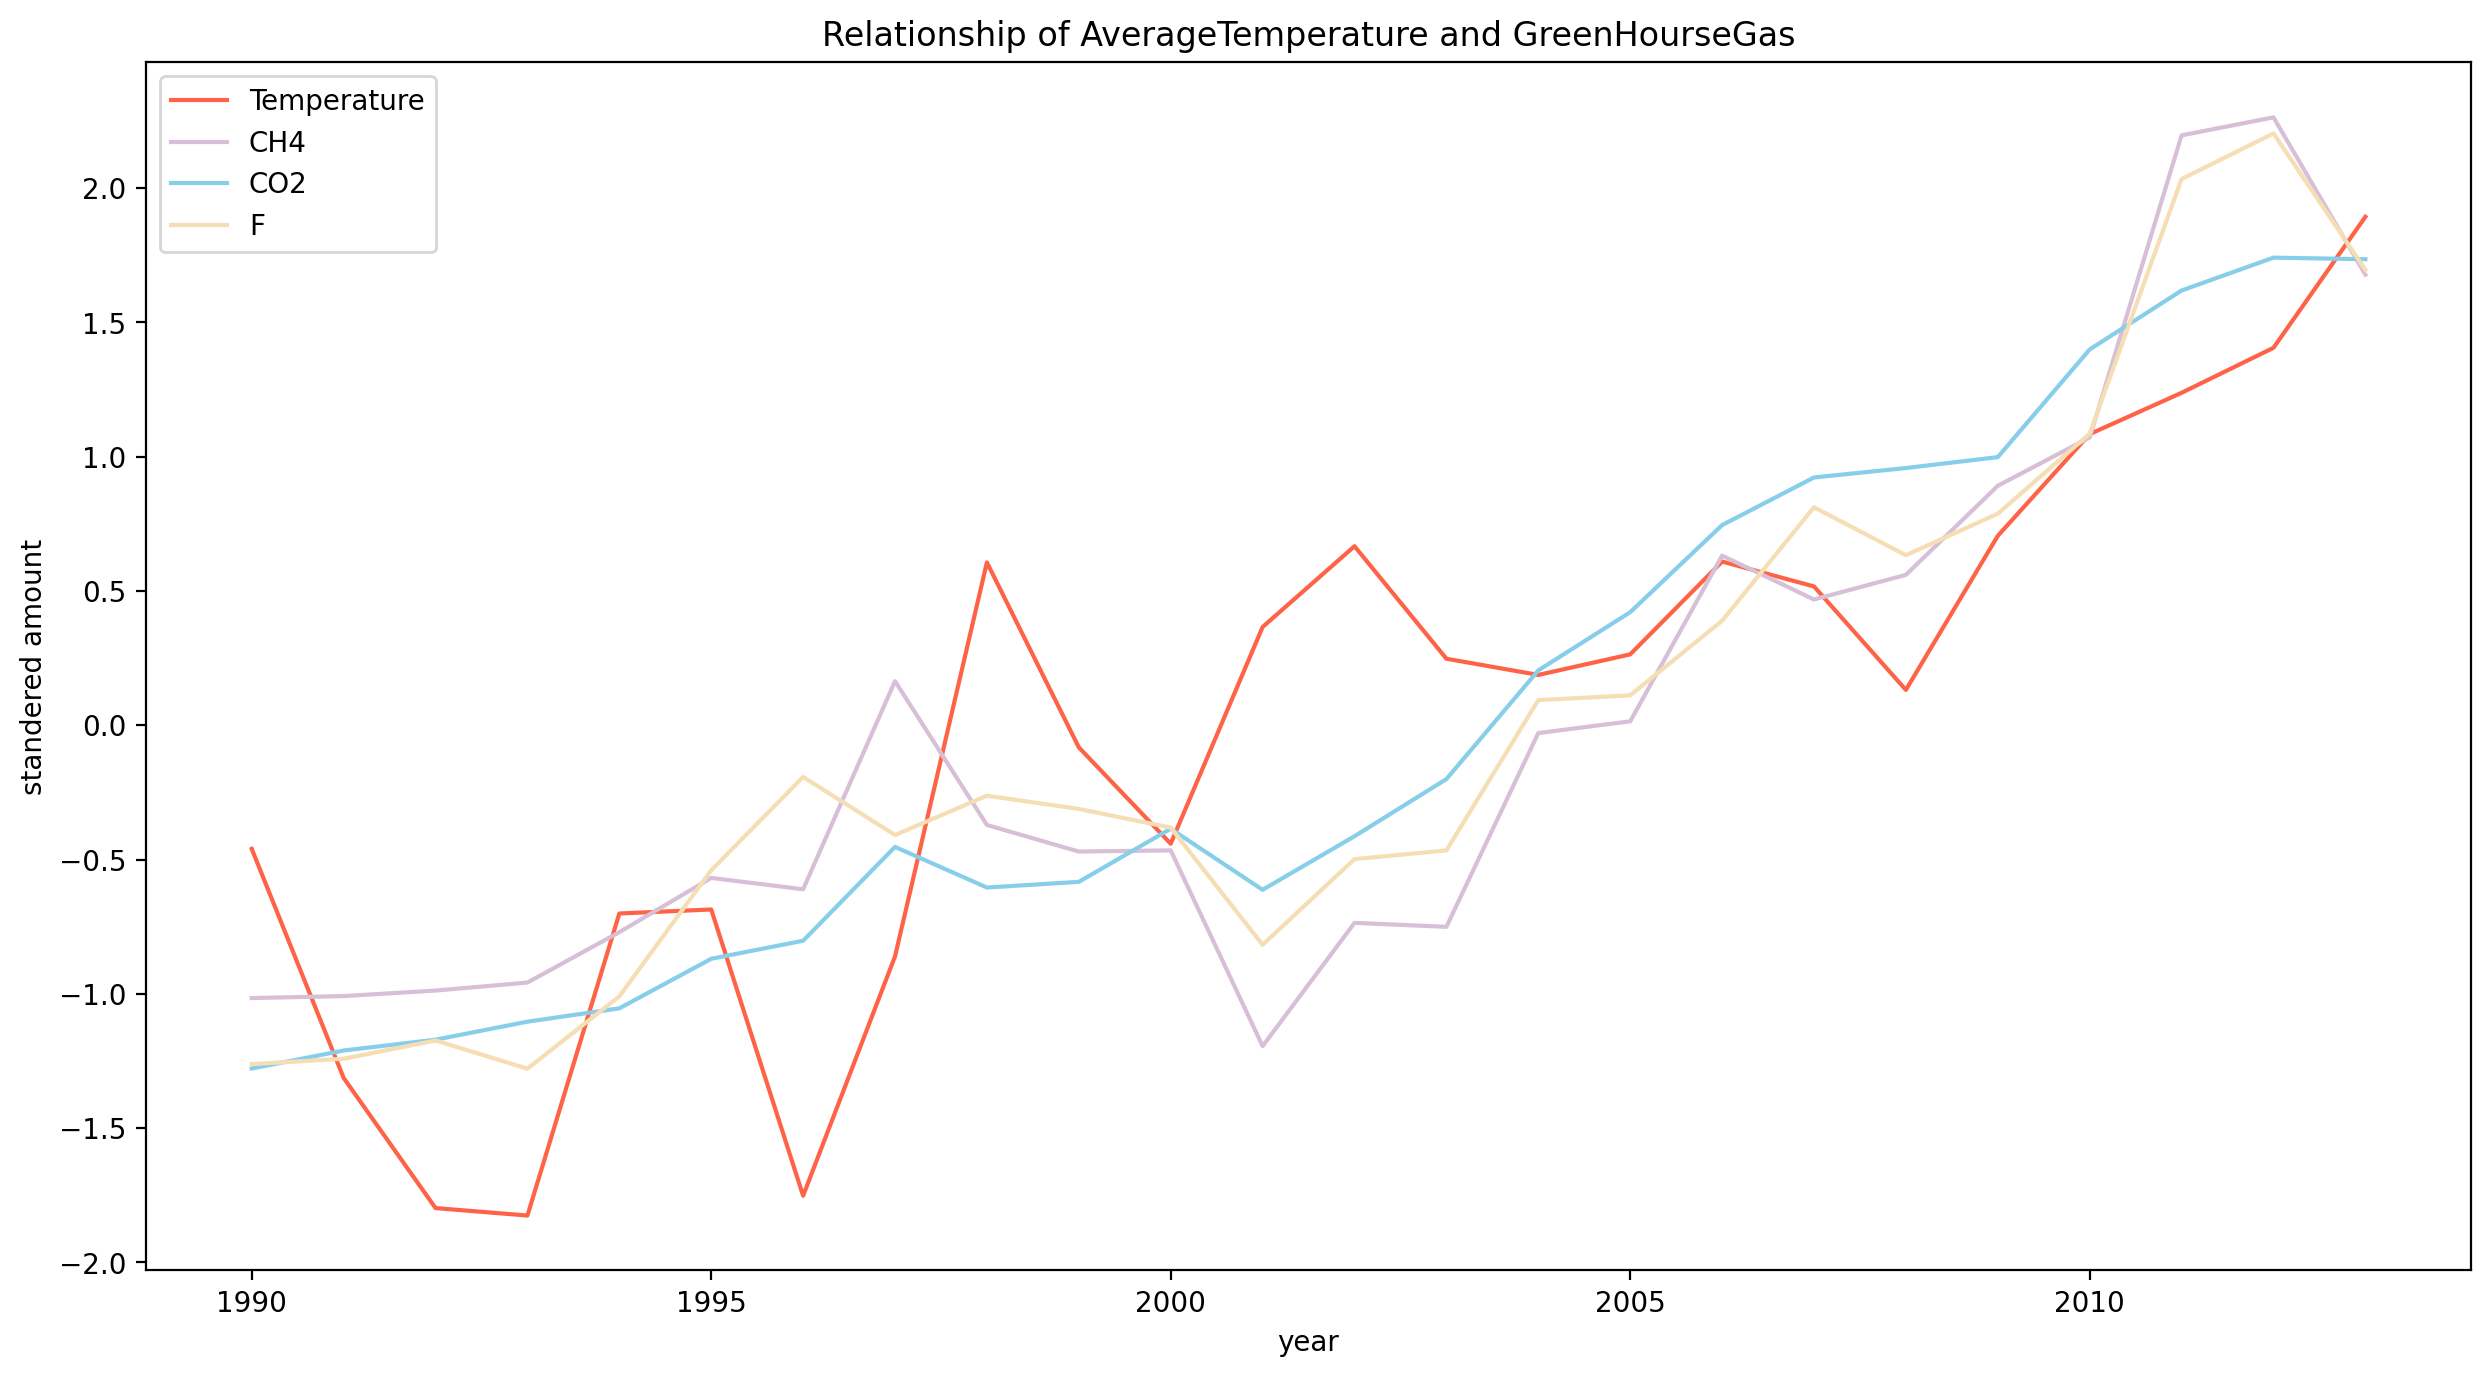

In [283]:
df = pd.merge(left=df_apmcm, right=df_CO2, on=['Country', 'year'])
df = pd.merge(left=df, right=df_CH4, on=['Country', 'year'])
df = pd.merge(left=df, right=df_NO2, on=['Country', 'year'])
df = pd.merge(left=df, right=df_F, on=['Country', 'year'])
for col in df.columns[2: ]:
    df[col] = df[col].map(lambda x: float(x))
df = df[df['AverageCO2']>=0]

df = df.groupby(['year']).mean()
df['year'] = df.index 
df.reset_index(drop=True, inplace=True)

from sklearn.preprocessing import StandardScaler

scaler_CO2 = StandardScaler()
scaler_NO2 = StandardScaler()
scaler_CH4 = StandardScaler()
scaler_F = StandardScaler()
scaler_Temp = StandardScaler()
df['AverageCO2'] = scaler_CO2.fit_transform(df[['AverageCO2']])
df['AverageNO2'] = scaler_CO2.fit_transform(df[['AverageNO2']])
df['AverageCH4'] = scaler_CO2.fit_transform(df[['AverageCH4']])
df['AverageF'] = scaler_CO2.fit_transform(df[['AverageF']])
df['AverageTemperature'] = scaler_Temp.fit_transform(df[['AverageTemperature']])

plt.figure(figsize=(15, 8), dpi=200)
plt.title('Relationship of AverageTemperature and GreenHourseGas')
plt.plot(df['year'], df['AverageTemperature'], label='Temperature', color='tomato')
plt.plot(df['year'], df['AverageCH4'], label='CH4', color='thistle')
plt.plot(df['year'], df['AverageCO2'], label='CO2', color='skyblue')
plt.plot(df['year'], df['AverageF'], label='F', color='wheat')
plt.xlabel('year')
plt.ylabel('standered amount')
plt.legend()
plt.savefig('../visualize/Relationship of AverageTemperature and GreenHourseGas.png')
plt.show()

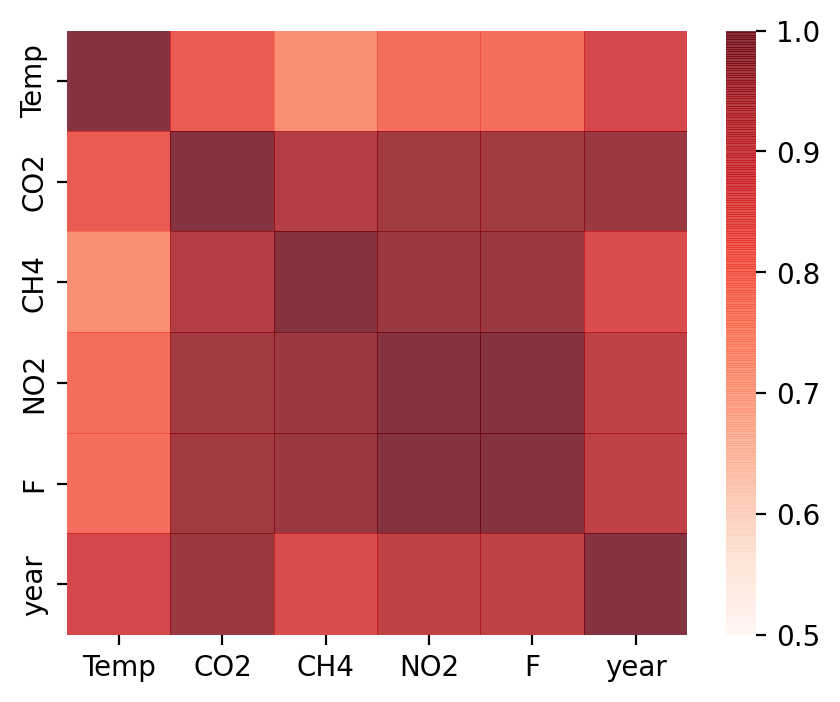

In [229]:
import seaborn as sns 


plt.figure(figsize=(5, 4), dpi=200)
sns.heatmap(df.rename(columns={'AverageTemperature': 'Temp', 'AverageCO2': 'CO2', 'AverageCH4': 'CH4', 'AverageNO2': 'NO2', 'AverageF': 'F'}).corr(), cmap='Reds', vmin=0.5, alpha=0.8)
plt.savefig('../visualize/relationship_of_temperature_and_green_hourse_gas_and_year.png')
plt.show()